Stratified sampling to ensure generalisation of dataset classes, as there could potentially be some datasets that are heavy LOS / NLOS. Performing this has now ensured that the dataset is evenly balanced for preprocessing

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from misc import save_to_pickle, load_from_pickle


# Load the dataset
df1 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

# Consolidating the datasets into a single DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

full_training = []
full_testing = []

# Stratified sampling based on 'NLOS' column iterate through EACH df INDIVIDUALLY! (70/30 split)
for x in range (1,8):
    train, test = train_test_split(locals()[f'df{x}'], test_size=0.3, stratify=locals()[f'df{x}']['NLOS'], random_state=42)
    full_training.append(train)
    full_testing.append(test)

# Concatenate the training and testing DataFrames
df_training = pd.concat(full_training)
df_testing = pd.concat(full_testing)

# Combine everything back together
df_combined = pd.concat([df_training, df_testing])

# Display the combined DataFrame
print(df_combined)

      NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
4507   0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
3609   0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2543   0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3114   0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
5379   0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...    ...    ...     ...      ...      ...      ...          ...      ...   
829    1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
2669   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
1066   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
1465   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
2266   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

      MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR100

Step 2. Check data for any missing or null values


In [12]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df_combined.isnull().isna().any().any()
missing_values

False

Perform aggregation on CIR columns to obtain summary of features

Can explore more options such as ToA, path dominance, decay rate as well as clustering

In [11]:
# Filter the dataset to only include the CIR columns containing the channel impulse response data
cir_df = df_combined.drop(df_combined.iloc[:, :15], axis=1).copy()
cir_df

#Save filtered df to file
# save_to_pickle("cir_df", cir_df)

# new_df = load_from_pickle("cir_df")
# new_df

,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
4507,733.0,363.0,497.0,618.0,387.0,703.0,536.0,321.0,298.0,156.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
3609,71.0,206.0,182.0,277.0,252.0,336.0,259.0,305.0,120.0,185.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2543,348.0,293.0,334.0,336.0,246.0,186.0,475.0,197.0,447.0,103.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3114,151.0,177.0,496.0,193.0,200.0,298.0,117.0,251.0,308.0,308.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
5379,127.0,81.0,340.0,134.0,297.0,269.0,291.0,201.0,207.0,189.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,173.0,60.0,216.0,348.0,384.0,182.0,96.0,252.0,271.0,100.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
2669,392.0,354.0,402.0,535.0,1146.0,283.0,972.0,562.0,117.0,466.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
1066,309.0,295.0,242.0,301.0,187.0,144.0,118.0,171.0,291.0,80.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
1465,94.0,244.0,256.0,250.0,158.0,248.0,213.0,194.0,286.0,160.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


In [14]:
# AGGREGATION
######################
# Peak Value
df_combined['CIR_PEAK_VALUE'] = cir_df.max(axis=1)

# Energy Sum
df_combined['CIR_ENERGY_SUM'] = cir_df.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements
N = 100
early_cir_df = cir_df.iloc[:, :N]
df_combined['CIR_EARLY_ENERGY'] = early_cir_df.sum(axis=1)

# Display the new features to verify, note it shows first 5 only
df_combined[['CIR_PEAK_VALUE','CIR_ENERGY_SUM','CIR_EARLY_ENERGY']].head()

,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY
4507,21328.0,690693.0,43361.0
3609,17025.0,350447.0,18857.0
2543,17838.0,442517.0,24651.0
3114,18138.0,362977.0,19265.0
5379,17817.0,366307.0,18168.0
...,...,...,...
829,11609.0,385449.0,25625.0
2669,17403.0,725497.0,54913.0
1066,19373.0,750502.0,20956.0
1465,22619.0,487767.0,21050.0


In [15]:
# AGGREGATION
######################
# Mean Value
df_combined['CIR_MEAN'] = cir_df.mean(axis=1)

# Variance
df_combined['CIR_VARIANCE'] = cir_df.var(axis=1)

# Skewness
df_combined['CIR_SKEWNESS'] = cir_df.skew(axis=1)

# Kurtosis
df_combined['CIR_KURTOSIS'] = cir_df.kurtosis(axis=1)

# Display the new features to verify
df_combined[['CIR_MEAN','CIR_VARIANCE','CIR_SKEWNESS','CIR_KURTOSIS']].head()

,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
4507,679.815945,2.791582e+06,7.548897,66.833927
3609,344.928150,1.485065e+06,10.453308,119.222133
2543,435.548228,1.524761e+06,9.276358,99.495962
3114,357.260827,1.524792e+06,10.457185,120.581015
5379,360.538386,1.295946e+06,9.705158,109.001843


SInce feature engineering is completed and we have aggregated all CIR individual data. We can drop the individual CIR data and use the first 14 features and the 7 aggregated features (14+7=22)

In [21]:
no_cir_df = df_combined.drop(df_combined.iloc[:, 15:-7], axis=1).copy()

no_cir_df

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,PREAM_LEN,BITRATE,PRFR,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
4507,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,1024.0,110.0,64.0,21328.0,690693.0,43361.0,679.815945,2.791582e+06,7.548897,66.833927
3609,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,1024.0,110.0,64.0,17025.0,350447.0,18857.0,344.928150,1.485065e+06,10.453308,119.222133
2543,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,1024.0,110.0,64.0,17838.0,442517.0,24651.0,435.548228,1.524761e+06,9.276358,99.495962
3114,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,1024.0,110.0,64.0,18138.0,362977.0,19265.0,357.260827,1.524792e+06,10.457185,120.581015
5379,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,1024.0,110.0,64.0,17817.0,366307.0,18168.0,360.538386,1.295946e+06,9.705158,109.001843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,1024.0,110.0,64.0,11609.0,385449.0,25625.0,379.378937,5.612658e+05,9.793655,117.900486
2669,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,1024.0,110.0,64.0,17403.0,725497.0,54913.0,714.071850,9.891505e+05,9.107614,115.730667
1066,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,1024.0,110.0,64.0,19373.0,750502.0,20956.0,738.683071,4.666633e+06,5.556110,33.264859
1465,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,1024.0,110.0,64.0,22619.0,487767.0,21050.0,480.085630,1.540242e+06,10.109507,139.096338


Part 2: Data visualization and Outlier Detection for first 15 features (NLOS, RANGE ........)

1 FOR NLOS

0 FOR LOS

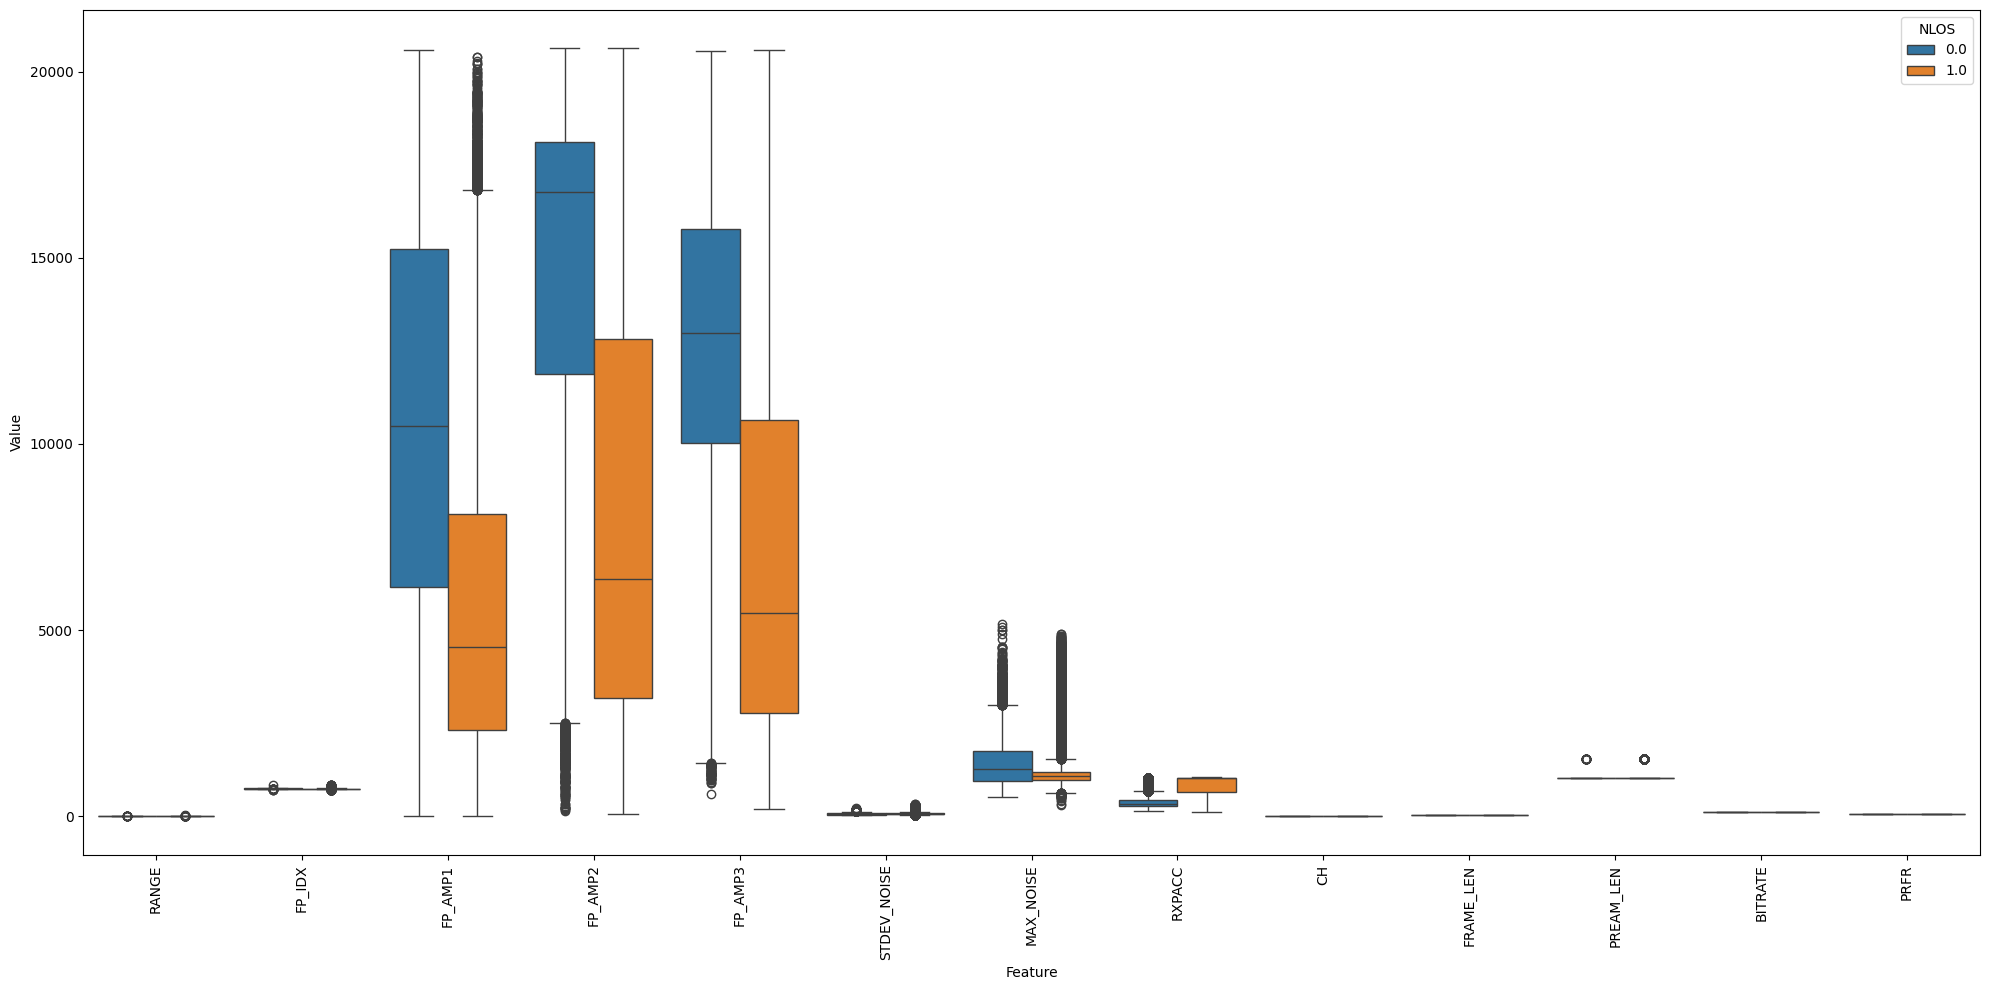

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 15 columns Drop the CIR_PWR column for better scaling visualization
temp_df = df_combined.iloc[:, :15].drop(['CIR_PWR'], axis=1,).copy()

# Melt the dataframe to long format for seaborn boxplot
df_melted = pd.melt(temp_df, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visualisation for NLOS against the CIR_PWR

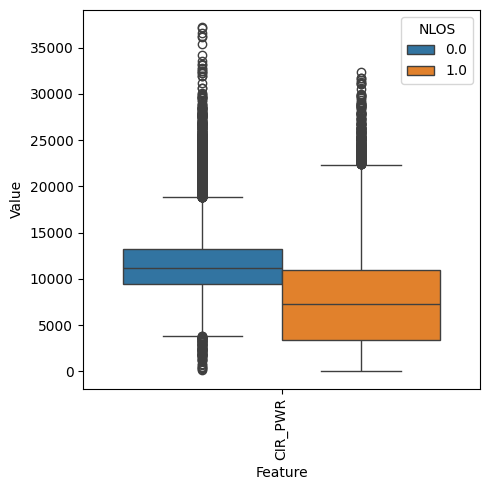

In [23]:
temp_df = df_combined[['NLOS','CIR_PWR']].copy()

df_melted = pd.melt(temp_df, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visualisation for NLOS against CIR PEAK VALUE AND EARLY ENERGY

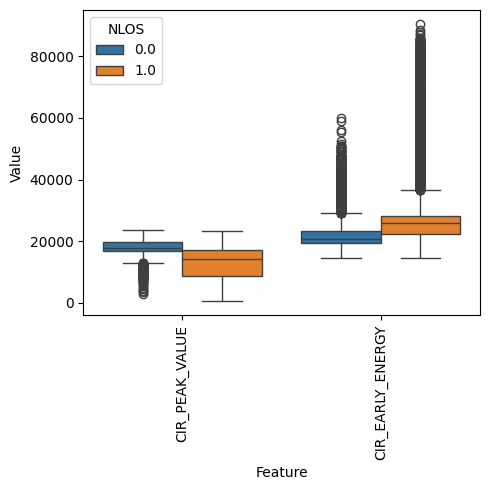

In [24]:
temp_df = pd.concat([df_combined.iloc[:, :1], df_combined.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS','CIR_PEAK_VALUE','CIR_EARLY_ENERGY']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visualisation of NLOS against CIR MEAN AND KURTOSIS

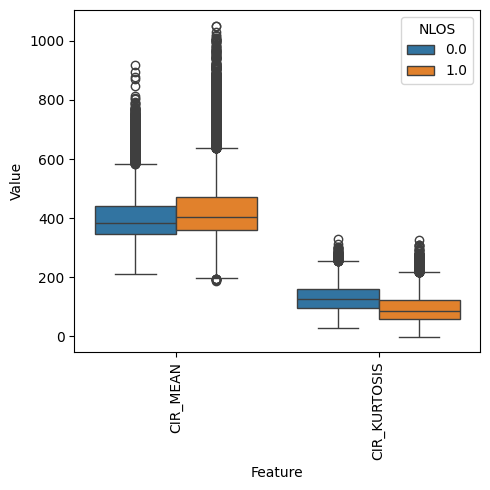

In [25]:
temp_df = pd.concat([df_combined.iloc[:, :1], df_combined.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS','CIR_MEAN','CIR_KURTOSIS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


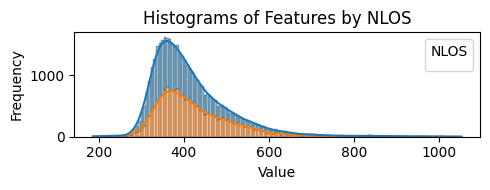

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


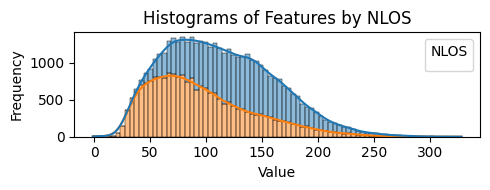

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with selected columns from df_combined
temp_df = pd.concat([df_combined.iloc[:, :1], df_combined.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS', 'CIR_MEAN']]

# Melt the DataFrame for plotting
df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

# Plot histograms
plt.figure(figsize=(5, 2))
sns.histplot(data=df_melted, x='Value', hue='NLOS', kde=True, multiple='stack')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Features by NLOS')
plt.legend(title='NLOS')
plt.tight_layout()
plt.show()

# Create a DataFrame with selected columns from df_combined
temp_df = pd.concat([df_combined.iloc[:, :1], df_combined.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS', 'CIR_KURTOSIS']]

# Melt the DataFrame for plotting
df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

# Plot histograms
plt.figure(figsize=(5, 2))
sns.histplot(data=df_melted, x='Value', hue='NLOS', kde=True, multiple='stack')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Features by NLOS')
plt.legend(title='NLOS')
plt.tight_layout()
plt.show()


In [43]:
no_cir_df

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,PREAM_LEN,BITRATE,PRFR,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
4507,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,1024.0,110.0,64.0,21328.0,690693.0,43361.0,679.815945,2.791582e+06,7.548897,66.833927
3609,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,1024.0,110.0,64.0,17025.0,350447.0,18857.0,344.928150,1.485065e+06,10.453308,119.222133
2543,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,1024.0,110.0,64.0,17838.0,442517.0,24651.0,435.548228,1.524761e+06,9.276358,99.495962
3114,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,1024.0,110.0,64.0,18138.0,362977.0,19265.0,357.260827,1.524792e+06,10.457185,120.581015
5379,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,1024.0,110.0,64.0,17817.0,366307.0,18168.0,360.538386,1.295946e+06,9.705158,109.001843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,1024.0,110.0,64.0,11609.0,385449.0,25625.0,379.378937,5.612658e+05,9.793655,117.900486
2669,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,1024.0,110.0,64.0,17403.0,725497.0,54913.0,714.071850,9.891505e+05,9.107614,115.730667
1066,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,1024.0,110.0,64.0,19373.0,750502.0,20956.0,738.683071,4.666633e+06,5.556110,33.264859
1465,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,1024.0,110.0,64.0,22619.0,487767.0,21050.0,480.085630,1.540242e+06,10.109507,139.096338


Plot histogram to check for skewed data, if data is very similarly normally distributed it's not the best, as you can find greater differences in skewed data

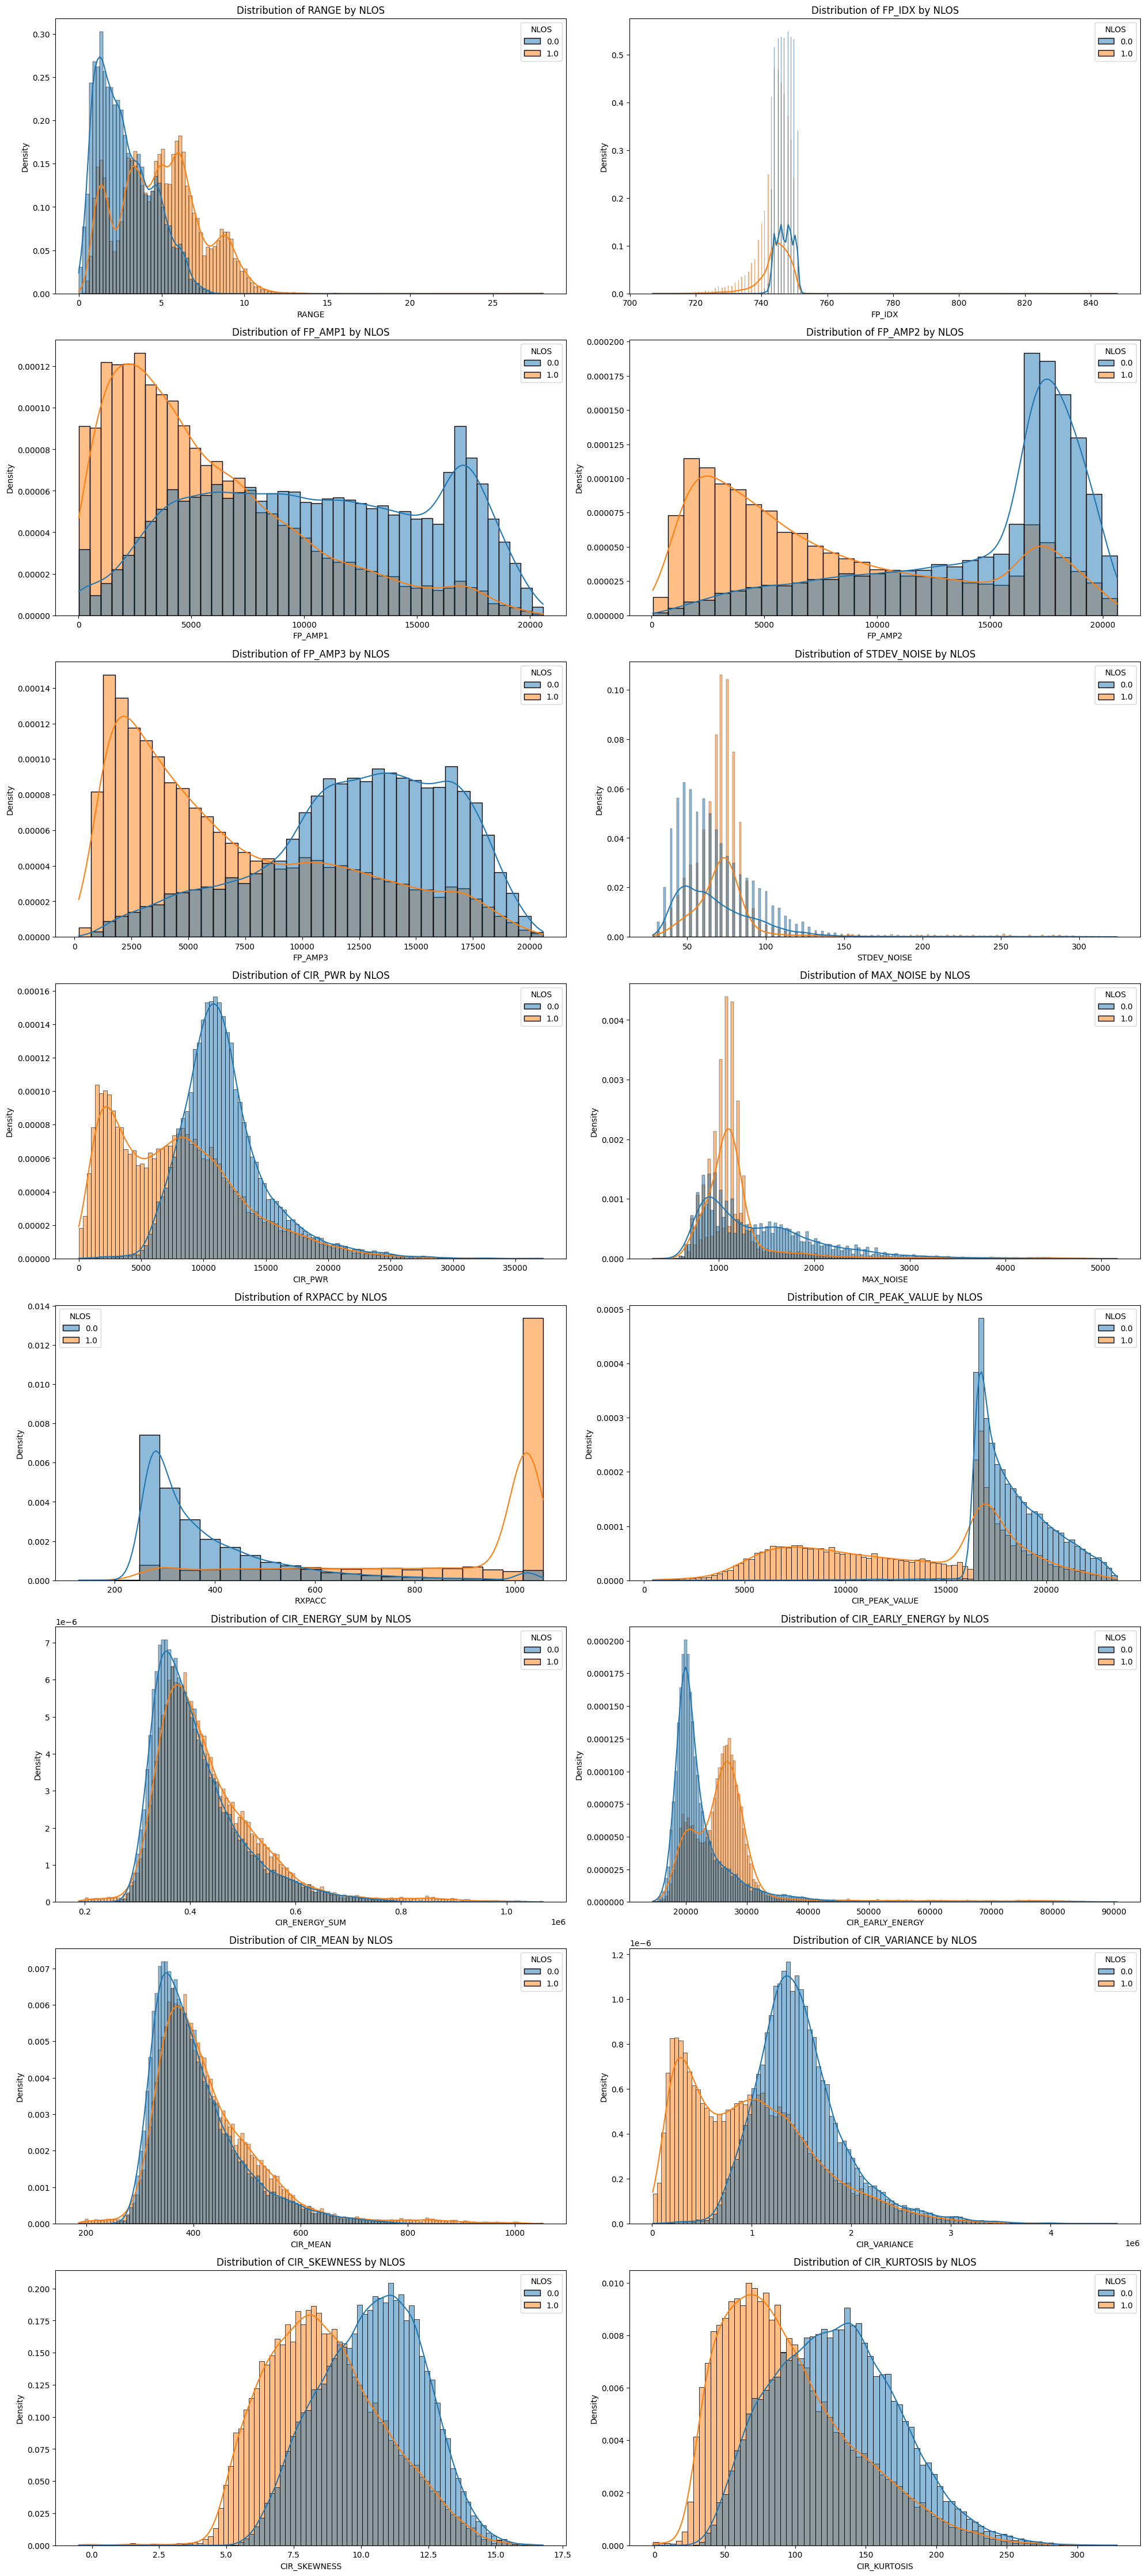

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with selected columns from df_combined
features = ['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
            'STDEV_NOISE','CIR_PWR','MAX_NOISE','RXPACC',
            'CIR_PEAK_VALUE','CIR_ENERGY_SUM','CIR_EARLY_ENERGY',
            'CIR_MEAN','CIR_VARIANCE','CIR_SKEWNESS','CIR_KURTOSIS']

# Plot numerical features with respect to the target variable
plt.figure(figsize=(20, 50))
for i, feature in enumerate(features, start=1):
    plt.subplot(len(features)//2 + 1, 2, i)
    sns.histplot(data=no_cir_df, x=feature, hue='NLOS', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by NLOS')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()
